In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["font.sans-serif"] = ["FangSong"]
plt.rcParams["axes.unicode_minus"] = False
plt.style.use("ggplot")

In [2]:
from scipy.interpolate import interp1d

x0 = [1, 2, 3, 4, 5]
y0 = [1.6, 1.8, 3.2, 5.9, 6.8]

x = np.arange(1, 5, 1 / 30)
# linear 是线性插值，返回 lambda 表达式
f1 = interp1d(x0, y0, "linear")
y1 = f1(x)
# interp1d 是三次样条插值，返回 lambda 表达式
f2 = interp1d(x0, y0, "cubic")
y2 = f2(x)
print(y1, "\n")
print(y2)

[1.6        1.60666667 1.61333333 1.62       1.62666667 1.63333333
 1.64       1.64666667 1.65333333 1.66       1.66666667 1.67333333
 1.68       1.68666667 1.69333333 1.7        1.70666667 1.71333333
 1.72       1.72666667 1.73333333 1.74       1.74666667 1.75333333
 1.76       1.76666667 1.77333333 1.78       1.78666667 1.79333333
 1.8        1.84666667 1.89333333 1.94       1.98666667 2.03333333
 2.08       2.12666667 2.17333333 2.22       2.26666667 2.31333333
 2.36       2.40666667 2.45333333 2.5        2.54666667 2.59333333
 2.64       2.68666667 2.73333333 2.78       2.82666667 2.87333333
 2.92       2.96666667 3.01333333 3.06       3.10666667 3.15333333
 3.2        3.29       3.38       3.47       3.56       3.65
 3.74       3.83       3.92       4.01       4.1        4.19
 4.28       4.37       4.46       4.55       4.64       4.73
 4.82       4.91       5.         5.09       5.18       5.27
 5.36       5.45       5.54       5.63       5.72       5.81
 5.9        5.93       5.

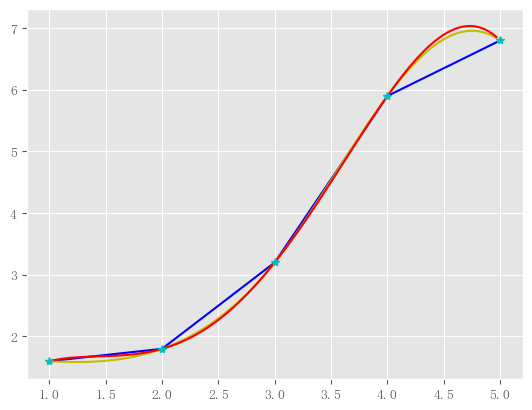

In [4]:
import numpy as np

def lagrange_interp(x, y, xi):
    """
    使用拉格朗日插值进行函数逼近。

    参数：
        x: list 或 numpy 数组，已知点的横坐标列表。
        y: list 或 numpy 数组，已知点的纵坐标列表。
        xi: list 或 numpy 数组，要进行插值的横坐标列表。

    返回值：
        numpy 数组，对应于输入的 xi 值的拉格朗日插值结果。
    """

    n = len(x)  # 已知点个数
    m = len(xi)  # 插值点个数
    yi = np.zeros(m)  # 初始化插值结果数组

    for k in range(m):  # 遍历插值点
        s = 0
        for i in range(n):  # 遍历已知点
            t = y[i]  # 初始化 t
            for j in range(n):  # 遍历已知点，计算插值项
                if i != j:
                    t *= (xi[k] - x[j]) / (x[i] - x[j])
            s += t  # 累加插值项
        yi[k] = s  # 存储插值结果
    
    return yi



y3 = lagrange_interp(x0, y0, x)
plt.plot(x, y1, "b-", x, y2, "y-", x, y3, "r-")
plt.plot(x0, y0, "c*")
plt.show()

$$
l_k(x) = \prod_{\substack{i=0 ,\ i \neq k}}^{n} \frac{x - x_i}{x_k - x_i} \\ 
L(x) = \sum_{k=0}^ny_kl_k(x)

In [ ]:
def lagrange_interp(x, y, xi):
    n = len(x)
    m = len(xi)
    yi = np.zeros(m)

    for j in range(m):
        s = 0
        for k in range(n):
            t = y[k]
            for i in range(n):
                if i != k:
                    t *= (xi[j] - x[i]) / (x[k] - x[i])
            s += t
        yi[j] = s
    return yi

In [33]:
# 定义一个 DataFrame 对象
# 数据使用字典
# 也要列出列的名称以便于一一匹对
df = pd.DataFrame(
    {
        "id": [1001, 1002, 1003, 1004, 1005, 1006],
        "date": pd.date_range("20130102", periods=6),
        "city": ["Beijing", "SH", "guangzhou", "Shenzhen", "shanghai", "BEIJING"],
        "age": [23, 44, 54, 32, 34, 32],
        "category": ["100-A", "100-B", "110-A", "110-C", "210-A", "130-F"],
        "price": [1200, np.nan, 2133, 5433, np.nan, 4432],
    },
    columns=["id", "date", "city", "category", "age", "price"],
)
df

,id,date,city,category,age,price
0,1001,2013-01-02,Beijing,100-A,23,1200.0
1,1002,2013-01-03,SH,100-B,44,NaN
2,1003,2013-01-04,guangzhou,110-A,54,2133.0
3,1004,2013-01-05,Shenzhen,110-C,32,5433.0
4,1005,2013-01-06,shanghai,210-A,34,NaN
5,1006,2013-01-07,BEIJING,130-F,32,4432.0


In [9]:
# 输出形状
df.shape

(6, 6)

In [10]:
# 输出信息
df.info

<bound method DataFrame.info of      id       date       city category  age   price
0  1001 2013-01-02    Beijing    100-A   23  1200.0
1  1002 2013-01-03         SH    100-B   44     NaN
2  1003 2013-01-04  guangzhou    110-A   54  2133.0
3  1004 2013-01-05   Shenzhen    110-C   32  5433.0
4  1005 2013-01-06   shanghai    210-A   34     NaN
5  1006 2013-01-07    BEIJING    130-F   32  4432.0>

In [11]:
# 行索引的下标以及相应下标的值
row_index_name_1 = df.index
row_index_name_2 = df.index.values
print(row_index_name_1)
print(row_index_name_2)

RangeIndex(start=0, stop=6, step=1)
[0 1 2 3 4 5]


In [12]:
# 输出相应变量的值
df["city"].values

array(['Beijing', 'SH', 'guangzhou', 'Shenzhen', 'shanghai', 'BEIJING'],
      dtype=object)

In [13]:
# 数据类型
df.dtypes

id                   int64
date        datetime64[ns]
city                object
category            object
age                  int64
price              float64
dtype: object

In [14]:
# 判断是否为空
df["price"].isnull()

0    False
1     True
2    False
3    False
4     True
5    False
Name: price, dtype: bool

In [15]:
# 去除重复值
df["age"].unique()

array([23, 44, 54, 32, 34], dtype=int64)

In [16]:
dataframe = pd.DataFrame({"a": [1, 2, 3], "b": ["aaa", "bbb", "ccc"]})

# 选取属性 "a" 中大于 1 的行：
dataframe[dataframe.a > 1]

,a,b
1,2,bbb
2,3,ccc


In [20]:
# 选取属性 "a" 中大于 1 的 "b" 列：
dataframe["b"][dataframe.a > 2]

2    ccc
Name: b, dtype: object

In [24]:
# 选取属性 "b" 在 list 中的行
list = [1, 2]
dataframe[dataframe.a.isin(list)]

,a,b
0,1,aaa
1,2,bbb


In [5]:
dataframe_1 = df.loc[df["city"] == "Beijing", ["age", "id"]]
dataframe_1

,age,id
0,23,1001


In [6]:
dataframe_2 = df.loc[df["age"] < 34, ["city", "id"]]
dataframe_2

,city,id
0,Beijing,1001
3,Shenzhen,1004
5,BEIJING,1006


In [11]:
dataframe_3 = df.loc[(df["age"] < 50) & (df["price"] < 6000), ["id", "city"]]
dataframe_3

,id,city
0,1001,Beijing
3,1004,Shenzhen
5,1006,BEIJING


In [18]:
# 填充空缺值，如果在原对象修改，则添加 inplace 参数，并置为 True，即 fillna(value=10, inplace=True)
new_df = df.fillna(value=10)
new_df

,id,date,city,category,age,price
0,1001,2013-01-02,Beijing,100-A,23,1200.0
1,1002,2013-01-03,SH,100-B,44,10.0
2,1003,2013-01-04,guangzhou,110-A,54,2133.0
3,1004,2013-01-05,Shenzhen,110-C,32,5433.0
4,1005,2013-01-06,shanghai,210-A,34,10.0
5,1006,2013-01-07,BEIJING,130-F,32,4432.0


In [32]:
df["price"] = df["price"].interpolate(method="spline", order=3)
df

,id,date,city,category,age,price
0,1001,2013-01-02,Beijing,100-A,23,1200.000000
1,1002,2013-01-03,SH,100-B,44,-162.533333
2,1003,2013-01-04,guangzhou,110-A,54,2133.000000
3,1004,2013-01-05,Shenzhen,110-C,32,5433.000000
4,1005,2013-01-06,shanghai,210-A,34,7083.866667
5,1006,2013-01-07,BEIJING,130-F,32,4432.000000


In [35]:
# 均值填充
df["price"] = df["price"].fillna(value=df["price"].mean())
# 线性填充
df["price"] = df["price"].interpolate()
# 三次样条填充
df["price"] = df["price"].interpolate()

,id,date,city,category,age,price
0,1001,2013-01-02,Beijing,100-A,23,1200.0
1,1002,2013-01-03,SH,100-B,44,3299.5
2,1003,2013-01-04,guangzhou,110-A,54,2133.0
3,1004,2013-01-05,Shenzhen,110-C,32,5433.0
4,1005,2013-01-06,shanghai,210-A,34,3299.5
5,1006,2013-01-07,BEIJING,130-F,32,4432.0


In [39]:
df["city"] = df["city"].str.capitalize()
df

,id,date,city,category,age,price
0,1001,2013-01-02,Beijing,100-A,23,1200.0
1,1002,2013-01-03,Sh,100-B,44,3299.5
2,1003,2013-01-04,Guangzhou,110-A,54,2133.0
3,1004,2013-01-05,Shenzhen,110-C,32,5433.0
4,1005,2013-01-06,Shanghai,210-A,34,3299.5
5,1006,2013-01-07,Beijing,130-F,32,4432.0


In [41]:
df["price"] = df["price"].astype(int)
df

,id,date,city,category,age,price
0,1001,2013-01-02,Beijing,100-A,23,1200
1,1002,2013-01-03,Sh,100-B,44,3299
2,1003,2013-01-04,Guangzhou,110-A,54,2133
3,1004,2013-01-05,Shenzhen,110-C,32,5433
4,1005,2013-01-06,Shanghai,210-A,34,3299
5,1006,2013-01-07,Beijing,130-F,32,4432


In [42]:
df["city"] = df["city"].drop_duplicates()
df

,id,date,city,category,age,price
0,1001,2013-01-02,Beijing,100-A,23,1200
1,1002,2013-01-03,Sh,100-B,44,3299
2,1003,2013-01-04,Guangzhou,110-A,54,2133
3,1004,2013-01-05,Shenzhen,110-C,32,5433
4,1005,2013-01-06,Shanghai,210-A,34,3299
5,1006,2013-01-07,NaN,130-F,32,4432


In [44]:
df1 = pd.DataFrame(
    {
        "id": [1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008],
        "gender": [
            "male",
            "female",
            "male",
            "female",
            "male",
            "female",
            "male",
            "female",
        ],
        "pay": ["Y", "N", "Y", "Y", "N", "Y", "N", "Y"],
        "m-point": [10, 12, 20, 40, 40, 40, 30, 20],
    }
)

In [45]:
df_inner = pd.merge(df, df1, how="inner")
df_inner

,id,date,city,category,age,price,gender,pay,m-point
0,1001,2013-01-02,Beijing,100-A,23,1200,male,Y,10
1,1002,2013-01-03,Sh,100-B,44,3299,female,N,12
2,1003,2013-01-04,Guangzhou,110-A,54,2133,male,Y,20
3,1004,2013-01-05,Shenzhen,110-C,32,5433,female,Y,40
4,1005,2013-01-06,Shanghai,210-A,34,3299,male,N,40
5,1006,2013-01-07,NaN,130-F,32,4432,female,Y,40


In [46]:
df_left = pd.merge(df, df1, how="left")
df_left

,id,date,city,category,age,price,gender,pay,m-point
0,1001,2013-01-02,Beijing,100-A,23,1200,male,Y,10
1,1002,2013-01-03,Sh,100-B,44,3299,female,N,12
2,1003,2013-01-04,Guangzhou,110-A,54,2133,male,Y,20
3,1004,2013-01-05,Shenzhen,110-C,32,5433,female,Y,40
4,1005,2013-01-06,Shanghai,210-A,34,3299,male,N,40
5,1006,2013-01-07,NaN,130-F,32,4432,female,Y,40


In [47]:
df_right = pd.merge(df, df1, how="right")
df_right

,id,date,city,category,age,price,gender,pay,m-point
0,1001,2013-01-02,Beijing,100-A,23.0,1200.0,male,Y,10
1,1002,2013-01-03,Sh,100-B,44.0,3299.0,female,N,12
2,1003,2013-01-04,Guangzhou,110-A,54.0,2133.0,male,Y,20
3,1004,2013-01-05,Shenzhen,110-C,32.0,5433.0,female,Y,40
4,1005,2013-01-06,Shanghai,210-A,34.0,3299.0,male,N,40
5,1006,2013-01-07,NaN,130-F,32.0,4432.0,female,Y,40
6,1007,NaT,NaN,NaN,NaN,NaN,male,N,30
7,1008,NaT,NaN,NaN,NaN,NaN,female,Y,20


In [48]:
df_outer = pd.merge(df, df1, how="outer")
df_outer

,id,date,city,category,age,price,gender,pay,m-point
0,1001,2013-01-02,Beijing,100-A,23.0,1200.0,male,Y,10
1,1002,2013-01-03,Sh,100-B,44.0,3299.0,female,N,12
2,1003,2013-01-04,Guangzhou,110-A,54.0,2133.0,male,Y,20
3,1004,2013-01-05,Shenzhen,110-C,32.0,5433.0,female,Y,40
4,1005,2013-01-06,Shanghai,210-A,34.0,3299.0,male,N,40
5,1006,2013-01-07,NaN,130-F,32.0,4432.0,female,Y,40
6,1007,NaT,NaN,NaN,NaN,NaN,male,N,30
7,1008,NaT,NaN,NaN,NaN,NaN,female,Y,20


In [51]:
df_inner.set_index("id")

,date,city,category,age,price,gender,pay,m-point
id,,,,,,,,
1001,2013-01-02,Beijing,100-A,23,1200,male,Y,10
1002,2013-01-03,Sh,100-B,44,3299,female,N,12
1003,2013-01-04,Guangzhou,110-A,54,2133,male,Y,20
1004,2013-01-05,Shenzhen,110-C,32,5433,female,Y,40
1005,2013-01-06,Shanghai,210-A,34,3299,male,N,40
1006,2013-01-07,NaN,130-F,32,4432,female,Y,40


In [52]:
df_inner.sort_values(by=["price"])

,id,date,city,category,age,price,gender,pay,m-point
0,1001,2013-01-02,Beijing,100-A,23,1200,male,Y,10
2,1003,2013-01-04,Guangzhou,110-A,54,2133,male,Y,20
1,1002,2013-01-03,Sh,100-B,44,3299,female,N,12
4,1005,2013-01-06,Shanghai,210-A,34,3299,male,N,40
5,1006,2013-01-07,NaN,130-F,32,4432,female,Y,40
3,1004,2013-01-05,Shenzhen,110-C,32,5433,female,Y,40


In [61]:

df_inner = df_inner.sort_values(by=["age"])
df_inner = df_inner.sort_index()
df_inner

,date,city,category,age,price,gender,pay,m-point
id,,,,,,,,
1001,2013-01-02,Beijing,100-A,23,1200,male,Y,10
1004,2013-01-05,Shenzhen,110-C,32,5433,female,Y,40
1006,2013-01-07,NaN,130-F,32,4432,female,Y,40
1005,2013-01-06,Shanghai,210-A,34,3299,male,N,40
1002,2013-01-03,Sh,100-B,44,3299,female,N,12
1003,2013-01-04,Guangzhou,110-A,54,2133,male,Y,20


In [63]:
data = {
    'Product': ['A', 'B', 'A', 'B', 'A', 'B'],
    'Sales': [100, 200, 150, 300, 120, 250],
    'Quantity': [10, 15, 12, 20, 8, 18]
}

df = pd.DataFrame(data)
df

,Product,Sales,Quantity
0,A,100,10
1,B,200,15
2,A,150,12
3,B,300,20
4,A,120,8
5,B,250,18


In [67]:
grouped = df.groupby("Product")
total_quantities = grouped["Quantity"].sum()
total_quantities

Product
A    3
B    3
Name: Quantity, dtype: int64

In [71]:
sample1 = df.sample(n=2)
sample1

,Product,Sales,Quantity
3,B,300,20
0,A,100,10


In [81]:
sample2 = df.sample(frac=0.8, replace=True)
sample2

,Product,Sales,Quantity
5,B,250,18
3,B,300,20
0,A,100,10
2,A,150,12
2,A,150,12


In [85]:
# 生成统计摘要
df.describe()

,Sales,Quantity
count,6.000000,6.000000
mean,186.666667,13.833333
std,77.888810,4.665476
min,100.000000,8.000000
25%,127.500000,10.500000
50%,175.000000,13.500000
75%,237.500000,17.250000
max,300.000000,20.000000
